### ARIMA_Model.ipynb
#### ----------------------------------------
#### This notebook trains and evaluates the ARIMA time series model
#### on the processed sales data for a selected store. It is used
#### to explore classical statistical forecasting and validate performance
#### before integrating into the main pipeline.
#### ----------------------------------------

In [3]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
# Load data
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/2_Processed_dataset/train_data.csv", parse_dates=["Date"])
test = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/2_Processed_dataset/test_data.csv", parse_dates=["Date"])

In [7]:
# Filter for one store
store_id = 1
train_store = df[df["Store"] == store_id].set_index("Date")
test_store = test[test["Store"] == store_id].set_index("Date")

In [9]:
# Fit ARIMA model
model = ARIMA(train_store["Weekly_Sales"], order=(5,1,0))
fitted_model = model.fit()

C:\Users\ratho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\ratho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\ratho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [11]:
# Forecast
preds = fitted_model.predict(start=test_store.index[0], end=test_store.index[-1])

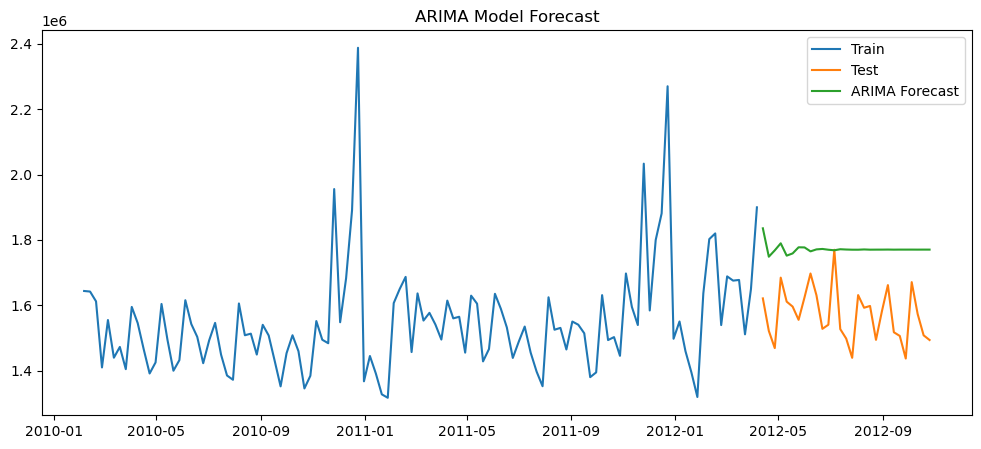

In [13]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(train_store["Weekly_Sales"], label="Train")
plt.plot(test_store["Weekly_Sales"], label="Test")
plt.plot(preds, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Model Forecast")
plt.show()

In [15]:
# RMSE
rmse = mean_squared_error(test_store["Weekly_Sales"], preds, squared=False)
print("ARIMA RMSE:", round(rmse, 2))

ARIMA RMSE: 214981.25


C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
